# AVISO

**Esse notebook é a versão em português do projeto.**

**This notebook is the Portuguese version of the project.**

[📘 Click here to open the English version of this notebook](https://github.com/cesardainezi/Time-Series-Forecasting-with-ARIMA/blob/main/Time%20Series%20Forecasting%20EN-US.ipynb).

[📘 *Clique aqui para abrir a versão em português deste notebook*](https://github.com/cesardainezi/Time-Series-Forecasting-with-ARIMA/blob/main/Time%20Series%20Forecasting%20EN-US.ipynb).

---

Autor: Cesar Augusto Watanabe Dainezi

Email: cesardainezi@gmail.com

# 1 Introdução

Neste projeto, trabalhamos com análise de séries temporais para prever os preços de fechamento das ações da Apple Inc. (AAPL), utilizando dados históricos do Yahoo Finance.

O principal objetivo é construir e testar um modelo de previsão usando o método ARIMA (AutoRegressive Integrated Moving Average), muito popular para problemas envolvendo séries temporais.

Optamos por usar os preços de fechamento diários devido à sua importância em aplicações do mundo real, como análise de investimentos, estratégias de trading e previsões de mercado. As etapas do projeto incluem:

* Obter dados históricos diários de janeiro de 2018 a julho de 2025

* Plotar a série temporal para entender seu comportamento

* Construir um modelo ARIMA com uma ordem (p, d, q) escolhida

* Testar o modelo com métricas de erro como MSE (Erro Quadrático Médio) e MAE (Erro Absoluto Médio)

* Melhorar o modelo buscando os melhores parâmetros usando uma busca em grade simples

Antes de treinar o modelo, convertemos o índice de tempo para valores inteiros para evitar problemas com datas irregulares, o que é comum em dados financeiros. Por fim, usamos o modelo treinado para fazer previsões sobre os dados de teste e comparamos os resultados com os valores reais.

# 2 Desenvolvimento do projeto

## 2.1 Obtendo dados com Yahoo Finance

In [6]:
import yfinance as yf
import pandas as pd

# Define o ticker (da ação)
ticker = 'AAPL'

# Baixa os dados de 1º de Janeiro de 2018 até 31 de Julho de 2025
data = yf.download(ticker, start='2018-01-01', end='2025-07-31')

# Exibe o dataframe obtido
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,40.426819,40.436208,39.722764,39.933983,102223600
2018-01-03,40.419785,40.964255,40.356422,40.490191,118071600
2018-01-04,40.607536,40.710798,40.384586,40.492539,89738400
2018-01-05,41.069859,41.156691,40.612224,40.703751,94640000
2018-01-08,40.917324,41.213026,40.818753,40.917324,82271200


In [7]:
# Verifica as informações do dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1904 entries, 2018-01-02 to 2025-07-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1904 non-null   float64
 1   (High, AAPL)    1904 non-null   float64
 2   (Low, AAPL)     1904 non-null   float64
 3   (Open, AAPL)    1904 non-null   float64
 4   (Volume, AAPL)  1904 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 89.2 KB


In [8]:
# Processa o dataframe para incluir apenas as datas e os preços de fechamento
close_df = data[('Close', 'AAPL')].to_frame(name='Close')

close_df.head()

,Close
Date,
2018-01-02,40.426819
2018-01-03,40.419785
2018-01-04,40.607536
2018-01-05,41.069859
2018-01-08,40.917324


## 2.2 Visualização dos dados

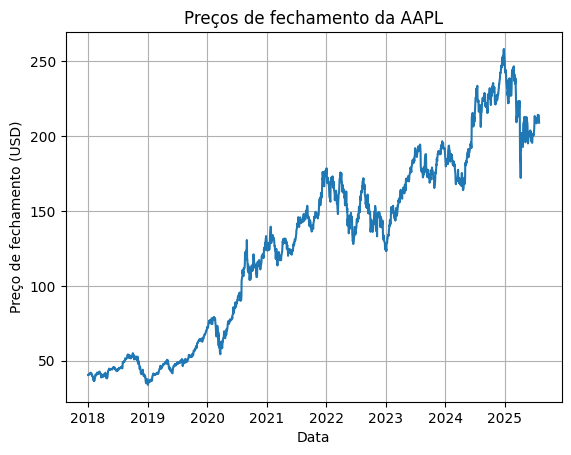

In [9]:
import matplotlib.pyplot as plt

plt.plot(close_df)
plt.title('Preços de fechamento da AAPL')
plt.xlabel('Data')
plt.ylabel('Preço de fechamento (USD)')
plt.grid(True)
plt.show()

## 2.3 O modelo ARIMA

In [11]:
from statsmodels.tsa.arima.model import ARIMA

# Divide os dados em treino e teste
train_size = int(len(close_df) * 0.8)
train_data, test_data = close_df[:train_size], close_df[train_size:]

# Salva os índices de test_data
test_data_indexes = test_data.index

# Redefine os índices de train_data e teste_data como inteiros
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

# Ajusta do modelo
model = ARIMA(train_data, order=(4, 1, 1))
model_fit = model.fit()

# Faz predições acerca dos dados de teste
predictions = model_fit.forecast(steps=len(test_data))

### 2.3.1 Visualização da predição e métricas

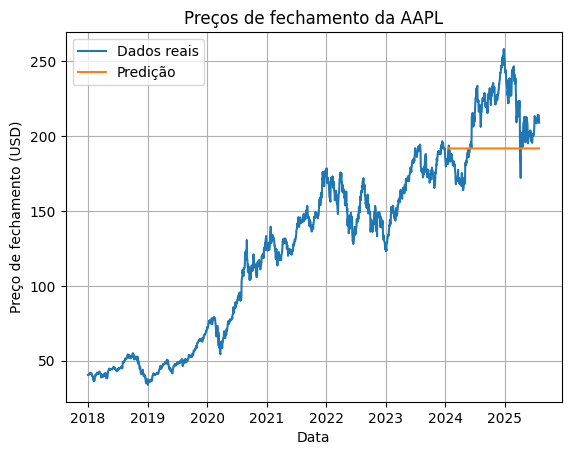

Erro Médio Quadrático (MSE): 876.8625819073511
Erro Médio Absoluto (MAE): 25.398620533069252


In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Copia os indices de data do test_data para predictions
predictions.index = test_data_indexes

# Plota as predições junto dos dados reais
plt.plot(close_df, label='Dados reais')
plt.plot(predictions, label='Predição')
plt.title('Preços de fechamento da AAPL')
plt.xlabel('Data')
plt.ylabel('Preço de fechamento (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Calcula e imprime as métricas de avaliação
mse = mean_squared_error(test_data, predictions)
mae = mean_absolute_error(test_data, predictions)
print(f'Erro Médio Quadrático (MSE): {mse}')
print(f'Erro Médio Absoluto (MAE): {mae}')

### 2.3.2 Refinamento do modelo

In [13]:
import itertools

# Define um intervalo para os parâmetros (p,d,q)
p = d = q = range(0, 5)

# Gera todas as combinações possíveis para (p,d,q)
parameters = list(itertools.product(p, d, q))

# Imprime algumas das combinações para checagem
print(parameters[:10])

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 0, 4), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 1, 4)]


In [14]:
# Cria lista de MSE (Erro Médio Quadrático) para cada conjunto de parâmetros
mse_list = []

# Percorre a lista de parametros
for param in parameters:
    # Tenta ajustar o modelo ARIMA
    try:
        # Notifica qual conjunto de parâmetros está sendo testado
        print(f"Parâmetros sendo testados: {param}")

        # Ajusta o modelo ARIMA
        model = ARIMA(train_data, order=param)
        model_fit = model.fit()

        # Realiza a predição
        predictions = model_fit.forecast(steps=len(test_data))

        # Calcula o MSE e adiciona à lista
        mse = mean_squared_error(test_data, predictions)
        mse_list.append(mse)
    except Exception as e:
        print(f"Error with parameters {param}: {e}")

Parâmetros sendo testados: (0, 0, 0)
Parâmetros sendo testados: (0, 0, 1)
Parâmetros sendo testados: (0, 0, 2)
Parâmetros sendo testados: (0, 0, 3)
Parâmetros sendo testados: (0, 0, 4)
Parâmetros sendo testados: (0, 1, 0)
Parâmetros sendo testados: (0, 1, 1)
Parâmetros sendo testados: (0, 1, 2)
Parâmetros sendo testados: (0, 1, 3)
Parâmetros sendo testados: (0, 1, 4)
Parâmetros sendo testados: (0, 2, 0)
Parâmetros sendo testados: (0, 2, 1)
Parâmetros sendo testados: (0, 2, 2)
Parâmetros sendo testados: (0, 2, 3)
Parâmetros sendo testados: (0, 2, 4)
Parâmetros sendo testados: (0, 3, 0)
Parâmetros sendo testados: (0, 3, 1)


Parâmetros sendo testados: (0, 3, 2)


Parâmetros sendo testados: (0, 3, 3)


Parâmetros sendo testados: (0, 3, 4)


Parâmetros sendo testados: (0, 4, 0)
Parâmetros sendo testados: (0, 4, 1)


Parâmetros sendo testados: (0, 4, 2)
Parâmetros sendo testados: (0, 4, 3)


Parâmetros sendo testados: (0, 4, 4)


Parâmetros sendo testados: (1, 0, 0)
Parâmetros sendo testados: (1, 0, 1)
Parâmetros sendo testados: (1, 0, 2)
Parâmetros sendo testados: (1, 0, 3)
Parâmetros sendo testados: (1, 0, 4)
Parâmetros sendo testados: (1, 1, 0)
Parâmetros sendo testados: (1, 1, 1)
Parâmetros sendo testados: (1, 1, 2)
Parâmetros sendo testados: (1, 1, 3)
Parâmetros sendo testados: (1, 1, 4)


Parâmetros sendo testados: (1, 2, 0)
Parâmetros sendo testados: (1, 2, 1)
Parâmetros sendo testados: (1, 2, 2)
Parâmetros sendo testados: (1, 2, 3)


Parâmetros sendo testados: (1, 2, 4)
Parâmetros sendo testados: (1, 3, 0)
Parâmetros sendo testados: (1, 3, 1)
Parâmetros sendo testados: (1, 3, 2)


Parâmetros sendo testados: (1, 3, 3)


Parâmetros sendo testados: (1, 3, 4)


Parâmetros sendo testados: (1, 4, 0)
Parâmetros sendo testados: (1, 4, 1)


Parâmetros sendo testados: (1, 4, 2)


Parâmetros sendo testados: (1, 4, 3)
Parâmetros sendo testados: (1, 4, 4)


Parâmetros sendo testados: (2, 0, 0)
Parâmetros sendo testados: (2, 0, 1)
Parâmetros sendo testados: (2, 0, 2)
Parâmetros sendo testados: (2, 0, 3)
Parâmetros sendo testados: (2, 0, 4)


Parâmetros sendo testados: (2, 1, 0)
Parâmetros sendo testados: (2, 1, 1)
Parâmetros sendo testados: (2, 1, 2)


Parâmetros sendo testados: (2, 1, 3)


Parâmetros sendo testados: (2, 1, 4)
Parâmetros sendo testados: (2, 2, 0)
Parâmetros sendo testados: (2, 2, 1)
Parâmetros sendo testados: (2, 2, 2)
Parâmetros sendo testados: (2, 2, 3)
Parâmetros sendo testados: (2, 2, 4)
Parâmetros sendo testados: (2, 3, 0)
Parâmetros sendo testados: (2, 3, 1)
Parâmetros sendo testados: (2, 3, 2)


Parâmetros sendo testados: (2, 3, 3)


Parâmetros sendo testados: (2, 3, 4)


Parâmetros sendo testados: (2, 4, 0)
Parâmetros sendo testados: (2, 4, 1)
Parâmetros sendo testados: (2, 4, 2)


Parâmetros sendo testados: (2, 4, 3)


Parâmetros sendo testados: (2, 4, 4)
Parâmetros sendo testados: (3, 0, 0)
Parâmetros sendo testados: (3, 0, 1)
Parâmetros sendo testados: (3, 0, 2)


Parâmetros sendo testados: (3, 0, 3)


Parâmetros sendo testados: (3, 0, 4)


Parâmetros sendo testados: (3, 1, 0)
Parâmetros sendo testados: (3, 1, 1)
Parâmetros sendo testados: (3, 1, 2)


Parâmetros sendo testados: (3, 1, 3)


Parâmetros sendo testados: (3, 1, 4)


Parâmetros sendo testados: (3, 2, 0)
Parâmetros sendo testados: (3, 2, 1)
Parâmetros sendo testados: (3, 2, 2)
Parâmetros sendo testados: (3, 2, 3)
Parâmetros sendo testados: (3, 2, 4)


Parâmetros sendo testados: (3, 3, 0)
Parâmetros sendo testados: (3, 3, 1)
Parâmetros sendo testados: (3, 3, 2)


Parâmetros sendo testados: (3, 3, 3)
Parâmetros sendo testados: (3, 3, 4)


Parâmetros sendo testados: (3, 4, 0)
Parâmetros sendo testados: (3, 4, 1)
Parâmetros sendo testados: (3, 4, 2)


Parâmetros sendo testados: (3, 4, 3)


Parâmetros sendo testados: (3, 4, 4)


Parâmetros sendo testados: (4, 0, 0)
Parâmetros sendo testados: (4, 0, 1)
Parâmetros sendo testados: (4, 0, 2)


Parâmetros sendo testados: (4, 0, 3)


Parâmetros sendo testados: (4, 0, 4)


Parâmetros sendo testados: (4, 1, 0)
Parâmetros sendo testados: (4, 1, 1)
Parâmetros sendo testados: (4, 1, 2)


Parâmetros sendo testados: (4, 1, 3)


Parâmetros sendo testados: (4, 1, 4)


Parâmetros sendo testados: (4, 2, 0)
Parâmetros sendo testados: (4, 2, 1)
Parâmetros sendo testados: (4, 2, 2)
Parâmetros sendo testados: (4, 2, 3)
Parâmetros sendo testados: (4, 2, 4)


Parâmetros sendo testados: (4, 3, 0)
Parâmetros sendo testados: (4, 3, 1)
Parâmetros sendo testados: (4, 3, 2)


Parâmetros sendo testados: (4, 3, 3)
Parâmetros sendo testados: (4, 3, 4)


Parâmetros sendo testados: (4, 4, 0)
Parâmetros sendo testados: (4, 4, 1)


Parâmetros sendo testados: (4, 4, 2)


Parâmetros sendo testados: (4, 4, 3)
Parâmetros sendo testados: (4, 4, 4)


Parâmetros ótimos: (2, 3, 4)


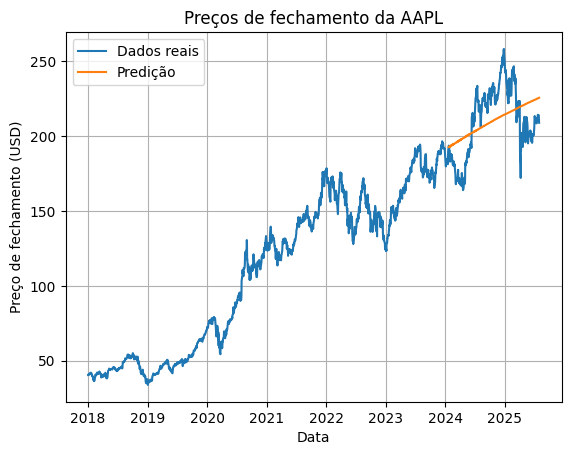

Erro Médio Quadrático (MSE): 401.35469437178415
Erro Médio Absoluto (MAE): 17.996824233935794


In [15]:
# Obtem o indice do MSE mínimo na mse_list
optimal_index = mse_list.index(min(mse_list))

# Obtem e imprime o conjunto de parâmetros ótimo (que minimiza o MSE)
optimal_parameters = parameters[optimal_index]
print(f"Parâmetros ótimos: {optimal_parameters}")

# Ajusta o modelo ARIMA para os parâmetros ótimos
model = ARIMA(train_data, order=optimal_parameters)
model_fit = model.fit()

# Realiza predição acerca dos dados de teste
predictions = model_fit.forecast(steps=len(test_data))

# Copia o índice de data do text_data para predictions
predictions.index = test_data_indexes

# Plota as predições junto dos dados reais
plt.plot(close_df, label='Dados reais')
plt.plot(predictions, label='Predição')
plt.title('Preços de fechamento da AAPL')
plt.xlabel('Data')
plt.ylabel('Preço de fechamento (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Calcula e imprime as métricas de avaliação
mse = mean_squared_error(test_data, predictions)
mae = mean_absolute_error(test_data, predictions)
print(f'Erro Médio Quadrático (MSE): {mse}')
print(f'Erro Médio Absoluto (MAE): {mae}')

# 3 Conclusão

Neste projeto, implementamos um modelo ARIMA para prever os preços de fechamento das ações da Apple Inc. (AAPL) com base em dados históricos. Optamos por utilizar o preço de fechamento não ajustado devido à indisponibilidade do preço ajustado no conjunto de dados obtido. O preço ajustado seria mais adequado, pois leva em conta eventos como splits e dividendos, proporcionando uma representação mais precisa do retorno real do investimento.

Inicialmente, testamos o modelo ARIMA com os parâmetros `(4,1,1)`, escolhidos sem um critério específico. Essa configuração resultou em um ajuste ruim, conforme evidenciado pelos altos valores de MSE e MAE, além da visualização no gráfico, que mostrava uma discrepância significativa entre as previsões e os valores reais.

Para melhorar o desempenho do modelo, realizamos uma busca em grade para encontrar os melhores parâmetros `(p, d, q)`. No entanto, devido ao alto custo computacional, limitamos a busca a valores máximos de 4 para cada parâmetro. Ainda assim, encontramos uma combinação mais eficiente: `(0,3,4)`. Com essa configuração, o modelo apresentou resultados significativamente melhores. Embora a curva de previsão não acompanhe perfeitamente os dados reais, o modelo foi capaz de capturar a tendência de crescimento das ações no período de predição, demonstrando sua utilidade para análises de médio prazo.

# 4 Próximos passos

Embora a implementação atual do ARIMA tenha fornecido resultados razoáveis, várias melhorias poderiam aumentar o poder preditivo do modelo.

Trabalhos futuros devem focar em técnicas mais sofisticadas de otimização de parâmetros, como otimização Bayesiana, para potencialmente descobrir combinações `(p,d,q)` melhores do que as identificadas em nossa busca em grade. O modelo poderia ser estendido para prever preços em períodos mais distantes, embora isso exigiria validação cuidadosa dada a incerteza inerente a previsões de longo prazo.

Também poderíamos testar o modelo em previsões de longo prazo, lembrando que, quanto mais distante for a previsão, menos confiáveis tendem a ser os resultados. Também seria interessante incluir fatores externos ou testar outros modelos, como LSTM ou Prophet, para comparar com o ARIMA.

As limitações computacionais permanecem um desafio, sugerindo o valor potencial de explorar soluções em nuvem ou processamento paralelo para permitir buscas de parâmetros mais exaustivas.